## **TASK 04: SENTIMENT ANALYSIS**

### Using VADER Pre - Trained Model


In [2]:
# Importing necessary libraries

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
# Downloading necessary NLTK data

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
# Loading the dataset

file_path = '/content/preprocessed_cleaned_worldnews_100_articles.csv'
data = pd.read_csv(file_path)

# Initializing VADER sentiment analyzer

sia = SentimentIntensityAnalyzer()

# Function to assign sentiment labels based on compound score

def get_sentiment_label(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Generating initial sentiment labels for the dataset

data['Sentiment'] = data['Content'].apply(lambda x: get_sentiment_label(str(x)))

# Saving the updated dataset to a new CSV file

output_path = 'news_articles_with_sentiments.csv'
data.to_csv(output_path, index=False)

print(data[['Content', 'Sentiment']])
print(f"Processed Dataset save to {output_path}")

                                              Content Sentiment
0   Fabio Quartararo has said he was impressed by ...  positive
1   Author of the article:\r\nArticle content\r\nB...   neutral
2   Rashid Vally, the visionary behind South Afric...  positive
3   <ol><li>Richard Smith, chair</li></ol><ol><li>...   neutral
4   Caracol’s acclaimed series El Secretario\r\nNE...  negative
..                                                ...       ...
77  UBS AM a distinct business unit of UBS ASSET M...  positive
78  Wolverine Trading LLC purchased a new stake in...  positive
79  Meghan Markle and Prince Harry wished the worl...  positive
80  The first-ever official PostgreSQL conference ...  positive
81  Fortification of the U.S. territory closest to...  positive

[82 rows x 2 columns]
Processed Dataset save to news_articles_with_sentiments.csv


Visualizing Sentiments

In [27]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Counting sentiments

sentiment_counts = data['Sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
positive    48
negative    20
neutral     14
Name: count, dtype: int64


<ipython-input-30-8c5aecce39ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


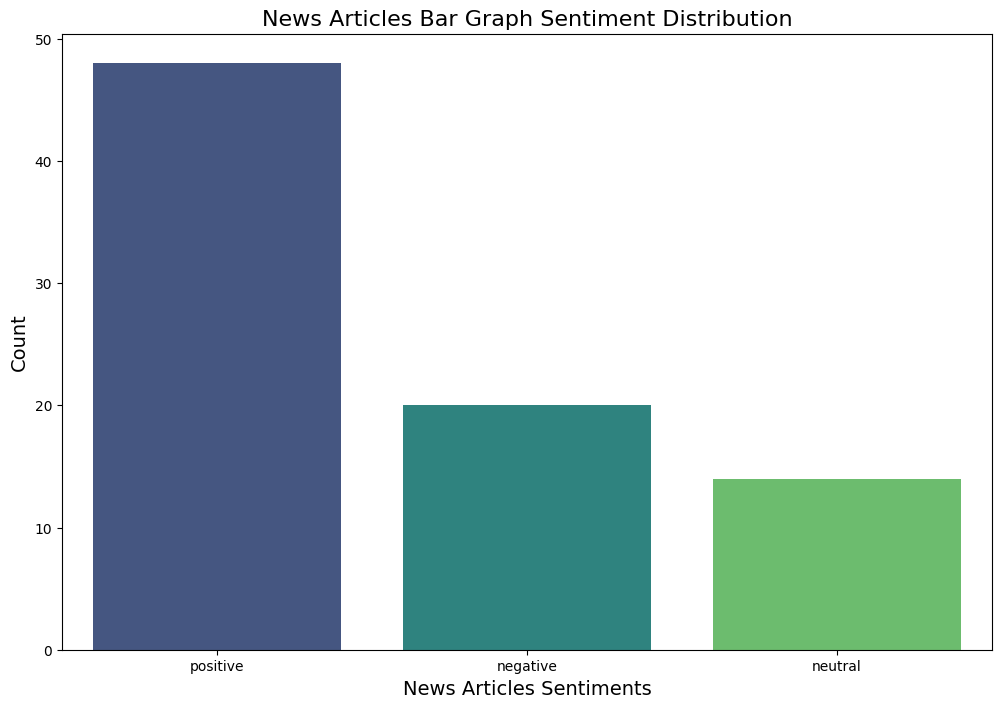

In [30]:
# Bar graph for sentiment distribution

plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("News Articles Bar Graph Sentiment Distribution", fontsize=16)
plt.xlabel("News Articles Sentiments", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

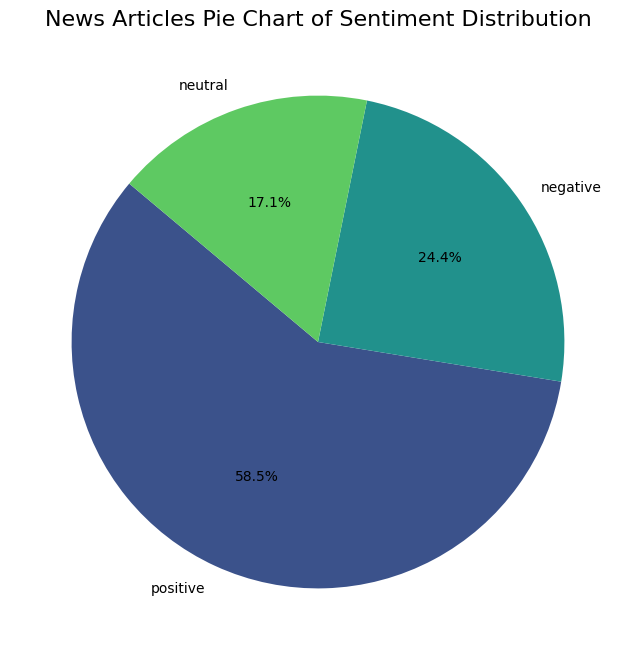

In [32]:
# Pie chart for sentiment distribution

plt.figure(figsize=(12, 8))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(sentiment_counts))
)
plt.title("News Articles Pie Chart of Sentiment Distribution", fontsize=16)
plt.show()

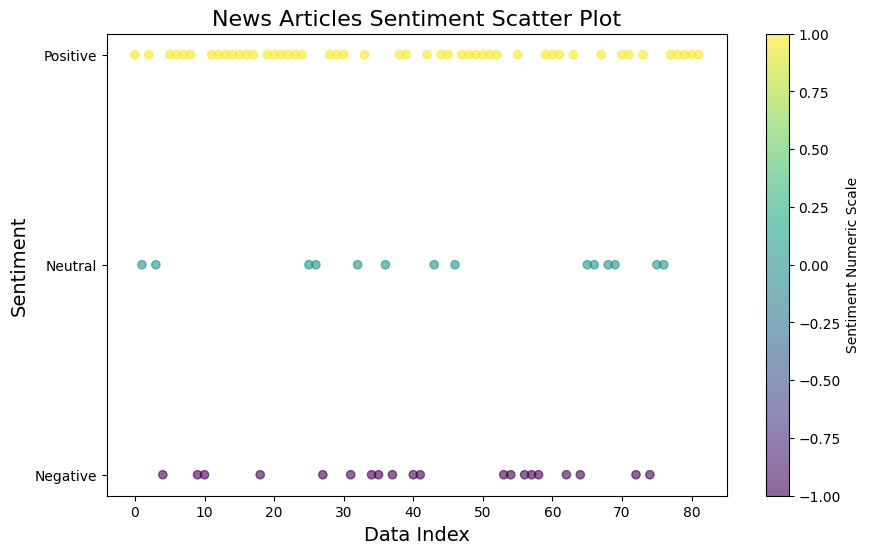

In [38]:
# Generating a numeric mapping for sentiments

sentiment_numeric_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['SentimentNumeric'] = data['Sentiment'].map(sentiment_numeric_mapping)


# Scatter plot of sentiments

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data['SentimentNumeric'], alpha=0.6, c=data['SentimentNumeric'], cmap='viridis')
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.title("News Articles Sentiment Scatter Plot", fontsize=16)
plt.xlabel("Data Index", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.colorbar(label='Sentiment Numeric Scale')
plt.show()

### Using TexBlob Pre - Trained Model

In [39]:
# Importing the pre-trained model

from textblob import TextBlob

In [41]:
# Loading the dataset

file_path = '/content/preprocessed_reddit_posts_with_stemming.csv'
data = pd.read_csv(file_path)

# Sentiment analysis using a lambda function

data['Sentiment'] = data['Title'].apply(
    lambda text: 'positive' if TextBlob(str(text)).sentiment.polarity > 0 else
                 ('negative' if TextBlob(str(text)).sentiment.polarity < 0 else 'neutral')
)

# Displaying the updated dataset

print(data[['Title', 'Sentiment']])

# Saving the updated dataset to a new CSV file

output_path = 'reddit_posts_with_sentiments.csv'
data.to_csv(output_path, index=False)

print(f"Processed dataset saved to {output_path}")

                                                 Title Sentiment
0    /r/WorldNews Live Thread: Russian Invasion of ...  positive
1    /r/WorldNews Live Thread: Israel at War (Threa...  positive
2    Zelenskyy: No world leader has the right to ne...  positive
3    Grocery prices set to rise as soil becomes "un...   neutral
4    Kremlin Accuses Ukraine Of Terrorism For Killi...  positive
..                                                 ...       ...
265  Ukraine's Special Forces claim to kill 50 Nort...  positive
266  A bomb kills the head of Russia’s nuclear defe...   neutral
267  UN General Assembly calls Russia's war against...  positive
268  Ukraine ‘claims responsibility’ for killing se...  positive
269  Poland Has Already Received 84 K2 Tanks from S...   neutral

[270 rows x 2 columns]
Processed dataset saved to reddit_posts_with_sentiments.csv


Visualizing Sentiments

In [42]:
# Counting all sentiments

sentiment_counts = data['Sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
positive    110
neutral     110
negative     50
Name: count, dtype: int64


<ipython-input-44-f89fa0314e49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


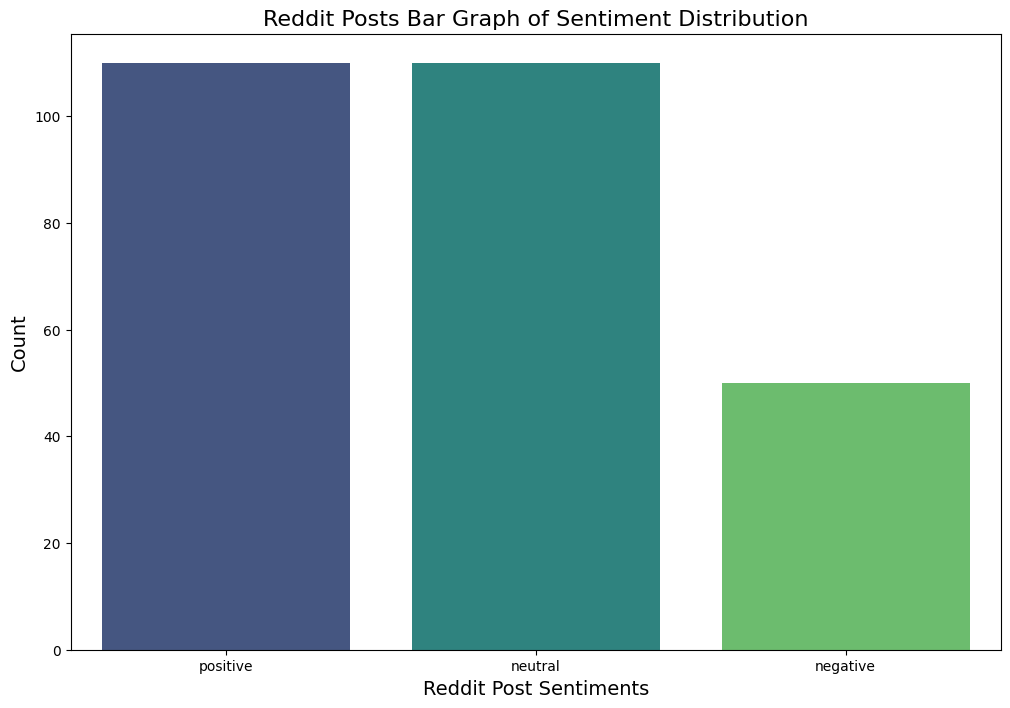

In [44]:
# Bar Graph

plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Reddit Posts Bar Graph of Sentiment Distribution", fontsize=16)
plt.xlabel("Reddit Post Sentiments", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

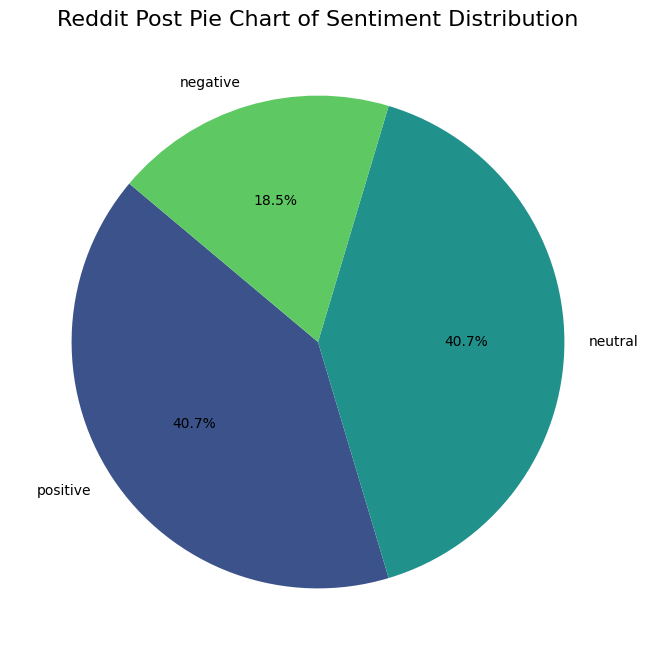

In [45]:
# Pie Chart

plt.figure(figsize=(12, 8))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(sentiment_counts))
)
plt.title("Reddit Post Pie Chart of Sentiment Distribution", fontsize=16)
plt.show()

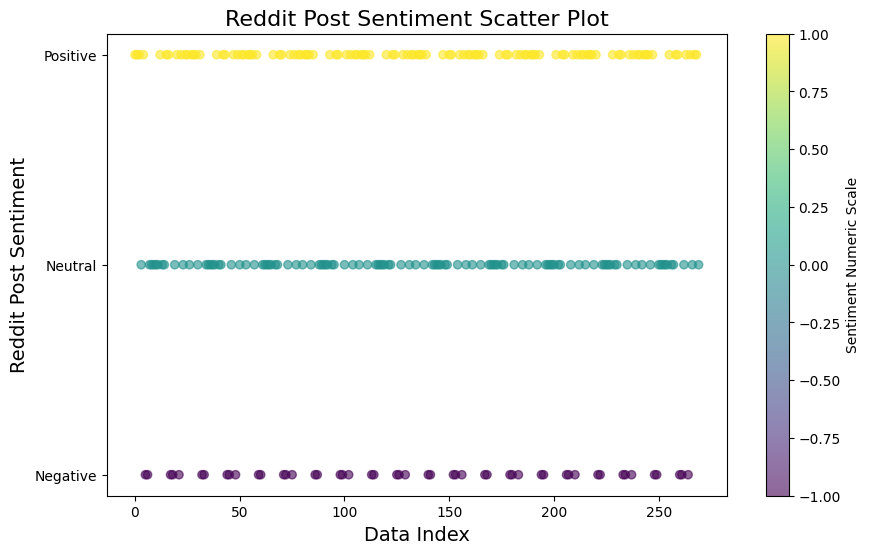

In [50]:
# Mapping sentiment categories to numeric values for scatter plot

sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['SentimentNumeric'] = data['Sentiment'].map(sentiment_mapping)

# Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(
    range(len(data)),
    data['SentimentNumeric'],
    alpha=0.6,
    c=data['SentimentNumeric'],
    cmap='viridis'
)
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.title("Reddit Post Sentiment Scatter Plot", fontsize=16)
plt.xlabel("Data Index", fontsize=14)
plt.ylabel("Reddit Post Sentiment", fontsize=14)
plt.colorbar(label='Sentiment Numeric Scale')
plt.show()

### Using RoBERTa Hugging Face Model

In [59]:
# Importing necessary library

from transformers import pipeline

In [60]:
# Loading the dataset

file_path = '/content/preprocessed_trending_tweets.csv'
data = pd.read_csv(file_path)

# Initializing RoBERTa sentiment analysis pipeline

sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Performing sentiment analysis

data['Sentiment'] = data['Text'].apply(
    lambda x: 'negative' if sentiment_analyzer(str(x))[0]['label'] == 'LABEL_0' else
              ('neutral' if sentiment_analyzer(str(x))[0]['label'] == 'LABEL_1' else 'positive')
)

# Displaying the updated dataset

print(data[['Text', 'Sentiment']].head())

# Saving the updated dataset

output_path = 'trending_tweets_with_sentiments.csv'
data.to_csv(output_path, index=False)

print(f"Processed dataset saved to {output_path}")

Device set to use cpu


                                                Text Sentiment
0  LET GET PAID AGAIN TONIGHT 🤑🤑\nTAP IN THE LINK...  positive
1  #Gravita #Chart \n\nCheck #trending #chartpatt...   neutral
2  Get inspired ✨\n\nPhoto\n#trending #digital #p...  positive
3  Andrew Tate police win bid to seize more than ...  negative
4  Mass grave of babies is found in British cemet...  negative
Processed dataset saved to trending_tweets_with_sentiments.csv


Visualizing Sentiments

In [61]:
# Counting all sentiments

sentiment_counts = data['Sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
positive    59
neutral     38
negative     3
Name: count, dtype: int64


<ipython-input-62-6daf619a92b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


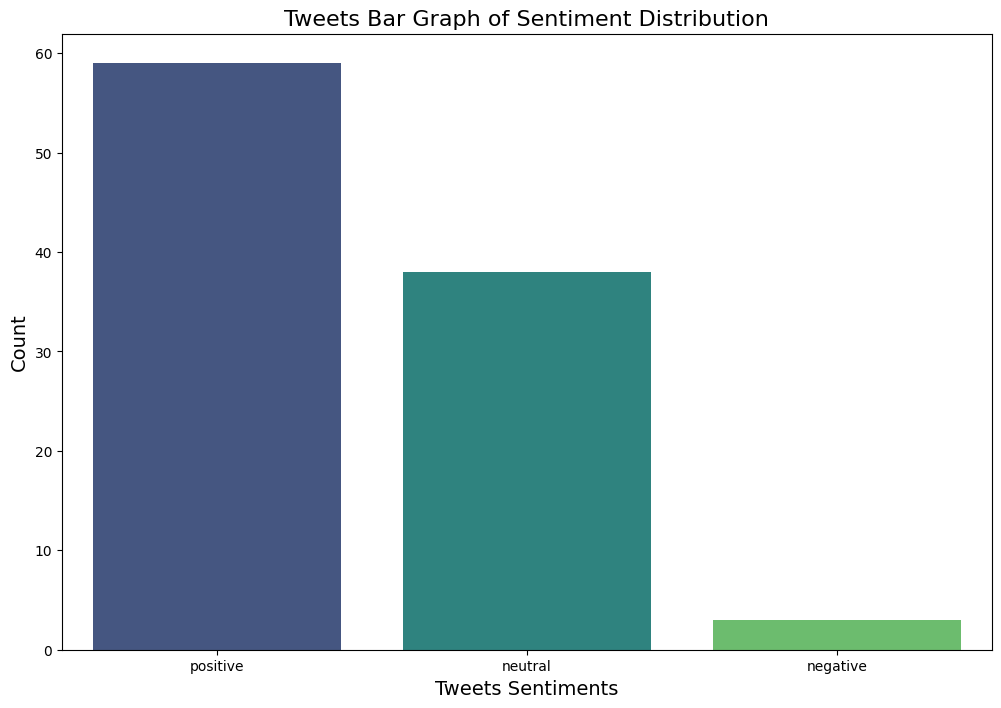

In [62]:
# Bar Graph

plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Tweets Bar Graph of Sentiment Distribution", fontsize=16)
plt.xlabel("Tweets Sentiments", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

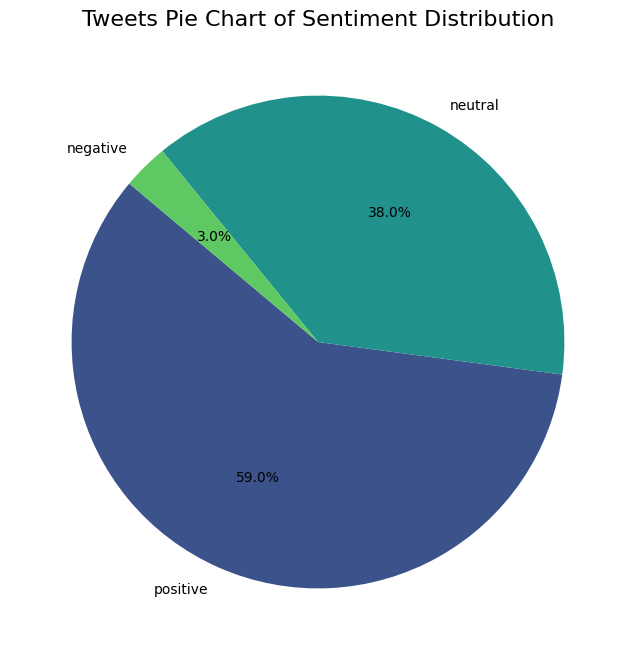

In [63]:
# Pie Chart

plt.figure(figsize=(12, 8))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(sentiment_counts))
)
plt.title("Tweets Pie Chart of Sentiment Distribution", fontsize=16)
plt.show()

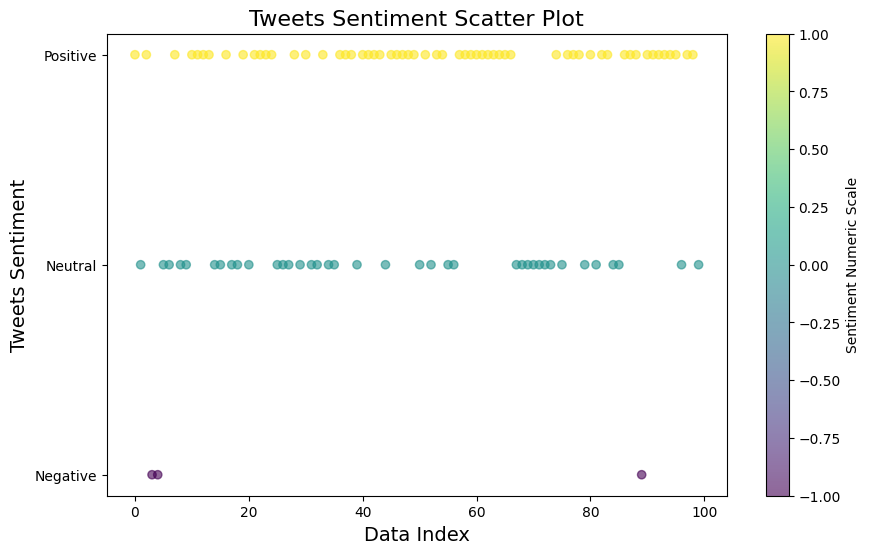

In [65]:
# Mapping sentiment categories to numeric values for scatter plot

sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['SentimentNumeric'] = data['Sentiment'].map(sentiment_mapping)

# Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(
    range(len(data)),
    data['SentimentNumeric'],
    alpha=0.6,
    c=data['SentimentNumeric'],
    cmap='viridis'
)
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.title("Tweets Sentiment Scatter Plot", fontsize=16)
plt.xlabel("Data Index", fontsize=14)
plt.ylabel("Tweets Sentiment", fontsize=14)
plt.colorbar(label='Sentiment Numeric Scale')
plt.show()

### Sentiment Analysis Over Time

<Figure size 1200x600 with 0 Axes>

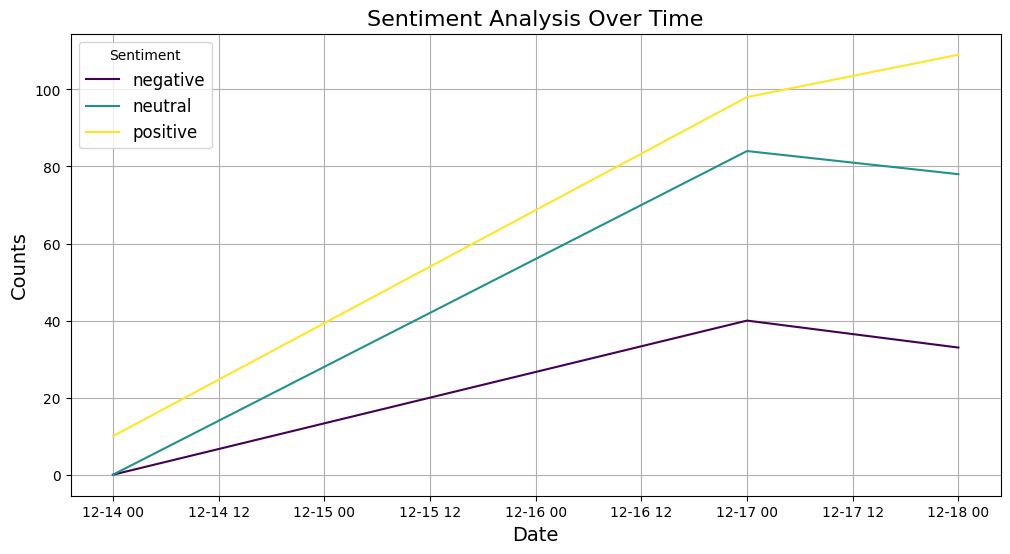

In [69]:
# Load datasets
file_paths = [
    '/content/reddit_posts_with_sentiments.csv',
    '/content/trending_tweets_with_sentiments.csv',
    '/content/news_articles_with_sentiments.csv'
]

# Combining datasets and standardizing Timestamp column names

datasets = []
for path in file_paths:
    df = pd.read_csv(path)

    # Renaming timestamp columns to "Published At"

    if 'Created At' in df.columns:
        df.rename(columns={'Created At': 'Published At'}, inplace=True)
    elif 'Created_At' in df.columns:
        df.rename(columns={'Created_At': 'Published At'}, inplace=True)
    elif 'Published At' not in df.columns:
        raise ValueError("No timestamp column found in the dataset.")
    datasets.append(df)

# Concatenating datasets

data_combined = pd.concat(datasets, ignore_index=True)

# Ensuring all datasets have 'Published At' and 'Sentiment' columns

if 'Published At' not in data_combined.columns or 'Sentiment' not in data_combined.columns:
    raise ValueError("Ensure all datasets include 'Published At' and 'Sentiment' columns.")

# Converting 'Published At' column to datetime format using format='mixed'

data_combined['Published At'] = pd.to_datetime(data_combined['Published At'], format='mixed', errors='coerce')

# Dropping rows with invalid dates

data_combined.dropna(subset=['Published At'], inplace=True)

# Aggregating sentiments over time

sentiment_over_time = data_combined.groupby([data_combined['Published At'].dt.date, 'Sentiment']).size().reset_index(name='Counts')

# Pivot table for plotting

sentiment_pivot = sentiment_over_time.pivot(index='Published At', columns='Sentiment', values='Counts').fillna(0)

# Plotting sentiment analysis over time

plt.figure(figsize=(12, 6))
sentiment_pivot.plot(kind='line', figsize=(12, 6), colormap='viridis')
plt.title("Sentiment Analysis Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend(title='Sentiment', fontsize=12)
plt.grid(True)
plt.show()